# Import data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
traindf, testdf = train_test_split(pd.read_csv('articles1.csv'), 
                                   test_size=.20, random_state=0)

#print out stats about shape of data
print('Train: {} rows {} columns'.format(traindf.shape[0],traindf.shape[1]))
print('Test: {} rows {} columns'.format(testdf.shape[0],testdf.shape[1]))

traindf.head()

Train: 40000 rows 10 columns
Test: 10000 rows 10 columns


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
20330,20333,39079,Trump to Launch Campaign Ads in Key Swing Stat...,Breitbart,Alex Swoyer,2016-08-17,2016.0,8.0,NaN,Donald Trump’s campaign will air its first gen...
17532,17534,36273,RNC on FBI Re-Opening Clinton Investigation: ’...,Breitbart,Katie McHugh,2016-10-28,2016.0,10.0,NaN,The Republican National Committee says that De...
45819,48788,68189,Take the quiz created by a ’super genius’ SAT ...,Business Insider,Abby Jackson,2016-02-14,2016.0,2.0,NaN,’’ ’’ ’With due to take place in just a few s...
34807,35497,54318,Chris Cornell funeral to be held May 26 in LA,CNN,Chloe Melas,2017-05-20,2017.0,5.0,NaN,"(CNN) Chris Cornell, the lead singer for Soun..."
31888,31960,50727,Ex-DNC chief Schultz confronts Comey about hac...,CNN,Phil Mattingly,2017-01-14,2017.0,1.0,NaN,Washington (CNN) Former Democratic National Co...


In [3]:
train_body_raw = traindf.content.tolist()
train_title_raw = traindf.title.tolist()

# Preprocessing

#### For x (body)

In [4]:
from keras.preprocessing.text import Tokenizer

tk_body = Tokenizer()
tk_body.fit_on_texts(train_body_raw)
print('Found %s unique words' % len(tk_body.word_index))
tk_body.num_words = 8000
train_body_vecs = tk_body.texts_to_sequences(train_body_raw)

/home/richard/deep_learn_p3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 237610 unique words


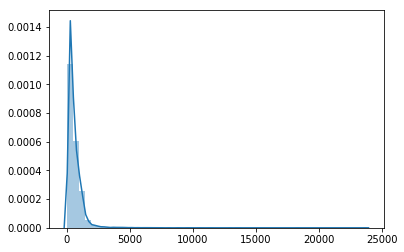

In [5]:
sns.distplot([len(seq) for seq in train_body_vecs])

In [6]:
from keras.preprocessing.sequence import pad_sequences
train_body_vecs = pad_sequences(train_body_vecs, 1000)

#### For y (title)

In [7]:
from Helpers import custom_pad_sequences

train_title_vecs, tk_title, _, _ = custom_pad_sequences(train_title_raw, 5000, 15)

tokenizing...
padding...


In [8]:
train_title_vecs.shape

(40000, 15)

In [9]:
train_title_vecs[0].shape

(15,)

#### Save tokenizers and vecs to local

In [10]:
import dill as dpickle
import numpy as np

# Save the preprocessor
with open('tk_body.dpkl', 'wb') as f:
    dpickle.dump(tk_body, f)

with open('tk_title.dpkl', 'wb') as f:
    dpickle.dump(tk_title, f)

# Save the processed data
np.save('train_body_vecs.npy', train_body_vecs)
np.save('train_title_vecs.npy', train_title_vecs)